In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

%matplotlib inline

# Data Description

In [2]:
pop_dataset=pd.read_csv('WorldPopulation.csv', index_col='Year')
pop_dataset.head()

,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
Year,,,,,,
2020,7794798739,1.05,81330639,52,4378993944,56
2019,7713468100,1.08,82377060,52,4299438618,56
2018,7631091040,1.10,83232115,51,4219817318,55
2017,7547858925,1.12,83836876,51,4140188594,55
2016,7464022049,1.14,84224910,50,4060652683,54


In [3]:
pop_dataset.shape

(70, 6)

In [4]:
pop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 2020 to 1951
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  70 non-null     int64  
 1   ChangePerc  70 non-null     float64
 2   NetChange   70 non-null     int64  
 3   Density     70 non-null     int64  
 4   Urban       70 non-null     int64  
 5   UrbanPerc   70 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 3.8 KB


In [5]:
pop_dataset.describe()

,Population,ChangePerc,NetChange,Density,Urban,UrbanPerc
count,7.000000e+01,70.000000,7.000000e+01,70.000000,7.000000e+01,70.000000
mean,5.002010e+09,1.616429,7.511954e+07,33.557143,2.226815e+09,42.200000
std,1.594877e+09,0.321288,1.256972e+07,10.723989,1.070191e+09,7.447595
min,2.584034e+09,1.050000,4.674740e+07,17.000000,7.750677e+08,30.000000
25%,3.570120e+09,1.262500,7.314225e+07,24.000000,1.294408e+09,36.000000
50%,4.915745e+09,1.770000,7.942852e+07,33.000000,2.035272e+09,41.500000
75%,6.361332e+09,1.847500,8.356683e+07,42.750000,3.054260e+09,48.000000
max,7.794799e+09,2.090000,9.290386e+07,52.000000,4.378994e+09,56.000000


In [6]:
print(pop_dataset.isnull().sum())

Population    0
ChangePerc    0
NetChange     0
Density       0
Urban         0
UrbanPerc     0
dtype: int64


No data missing in the given dataset.

# Data Visualization

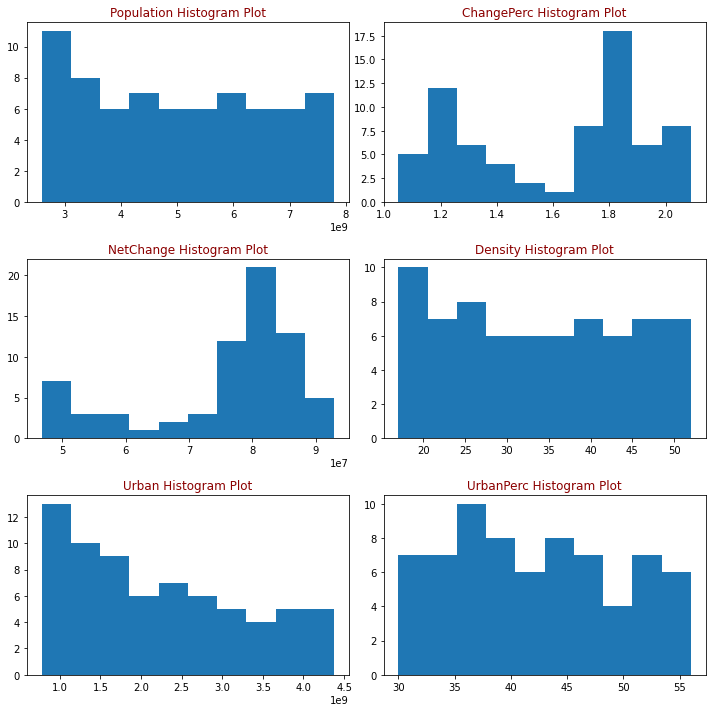

In [7]:
RP=plt.figure(figsize=(10,10))
for i, feature in enumerate(pop_dataset.columns):
    r=RP.add_subplot(3,2,i+1)
    plt.hist(pop_dataset[feature])
    r.set_title(feature+" Histogram Plot",color='DarkRed')
RP.tight_layout()  

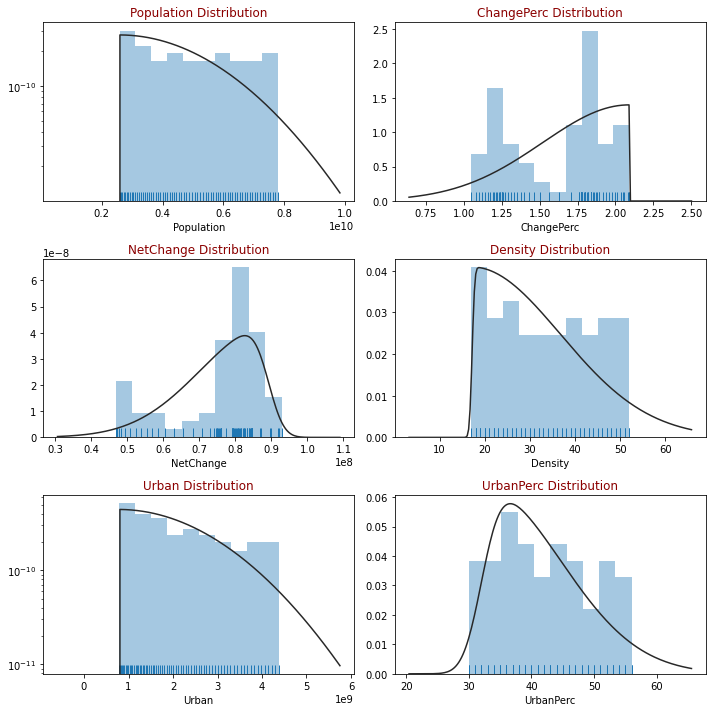

In [8]:
RP=plt.figure(figsize=(10,10))
for i, feature in enumerate(pop_dataset.columns):
    r=RP.add_subplot(3,2,i+1)
    sns.distplot(pop_dataset[feature],rug=True,bins=10,fit=skewnorm,kde=False) #for normalising, used skewnorm
    r.set_title(feature+" Distribution",color='DarkRed')
    if(feature=='Population' or feature=='Urban'):
        plt.yscale('log')
RP.tight_layout()  

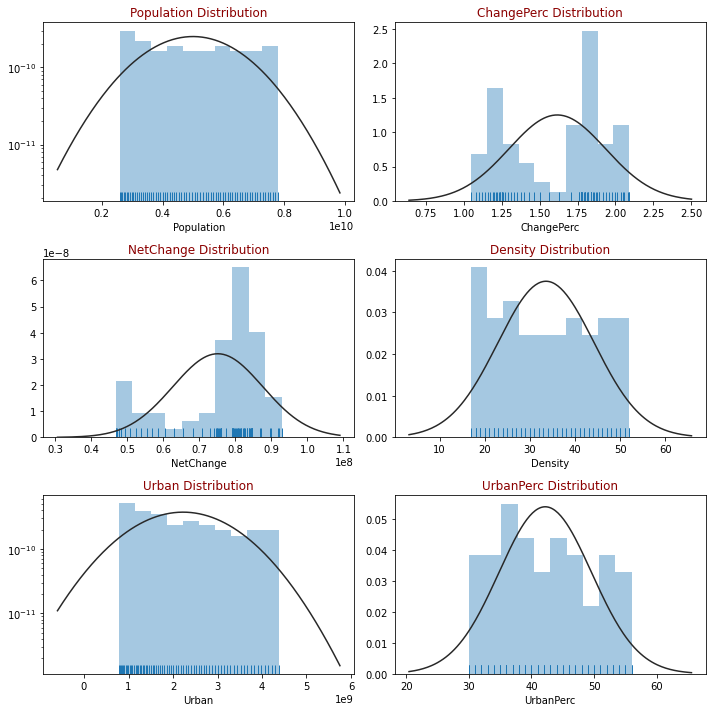

In [9]:
RP=plt.figure(figsize=(10,10))
for i, feature in enumerate(pop_dataset.columns):
    r=RP.add_subplot(3,2,i+1)
    sns.distplot(pop_dataset[feature],rug=True,bins=10,fit=norm,kde=False) #for normalising, used skewnorm
    r.set_title(feature+" Distribution",color='DarkRed')
    if(feature=='Population' or feature=='Urban'):
        plt.yscale('log')
RP.tight_layout()  

#### Right skewed distribution:
Population Distribution, Density Distribution, Urban Distribution
#### Left skewed distribution:
Change Percent Distribution, Net Change Distribution
#### Approximately normal distribution:
Urban Percentage Distribution

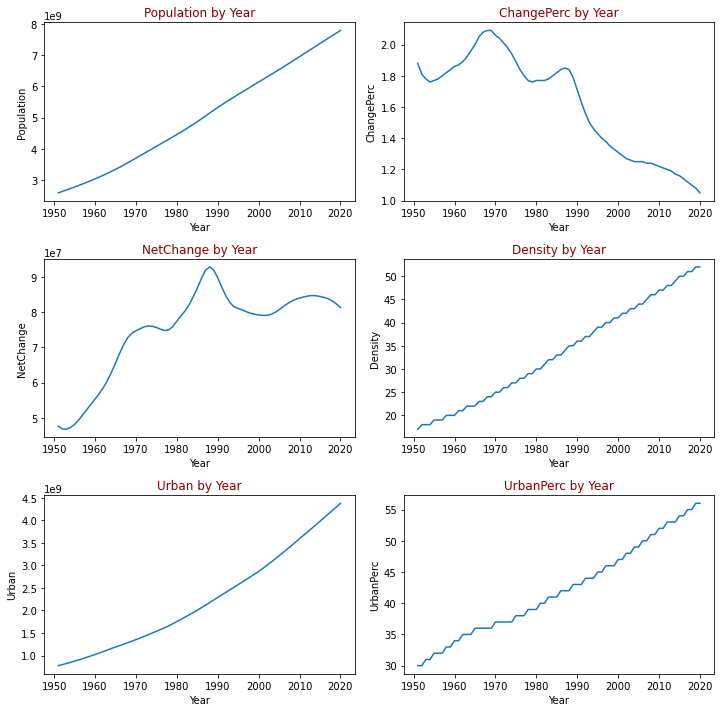

In [10]:
RP=plt.figure(figsize=(10,10))
for i, feature in enumerate(pop_dataset.columns):
    r=RP.add_subplot(3,2,i+1)
    sns.lineplot(pop_dataset.index,pop_dataset[feature])
    r.set_title(feature+" by Year",color='DarkRed')
RP.tight_layout()  

In [11]:
pop_correl=pop_dataset.corr()
print(pop_correl)

            Population  ChangePerc  NetChange   Density     Urban  UrbanPerc
Population    1.000000   -0.907773   0.768659  0.999640  0.993085   0.995669
ChangePerc   -0.907773    1.000000  -0.451671 -0.908100 -0.924174  -0.899791
NetChange     0.768659   -0.451671   1.000000  0.767797  0.706693   0.753161
Density       0.999640   -0.908100   0.767797  1.000000  0.992816   0.995339
Urban         0.993085   -0.924174   0.706693  0.992816  1.000000   0.995454
UrbanPerc     0.995669   -0.899791   0.753161  0.995339  0.995454   1.000000


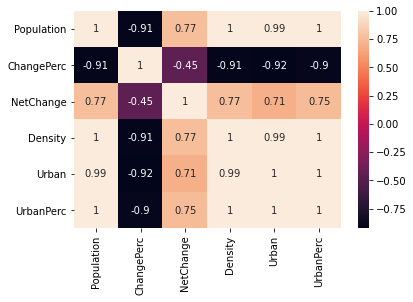

In [12]:
sns.heatmap(pop_correl,annot=True)

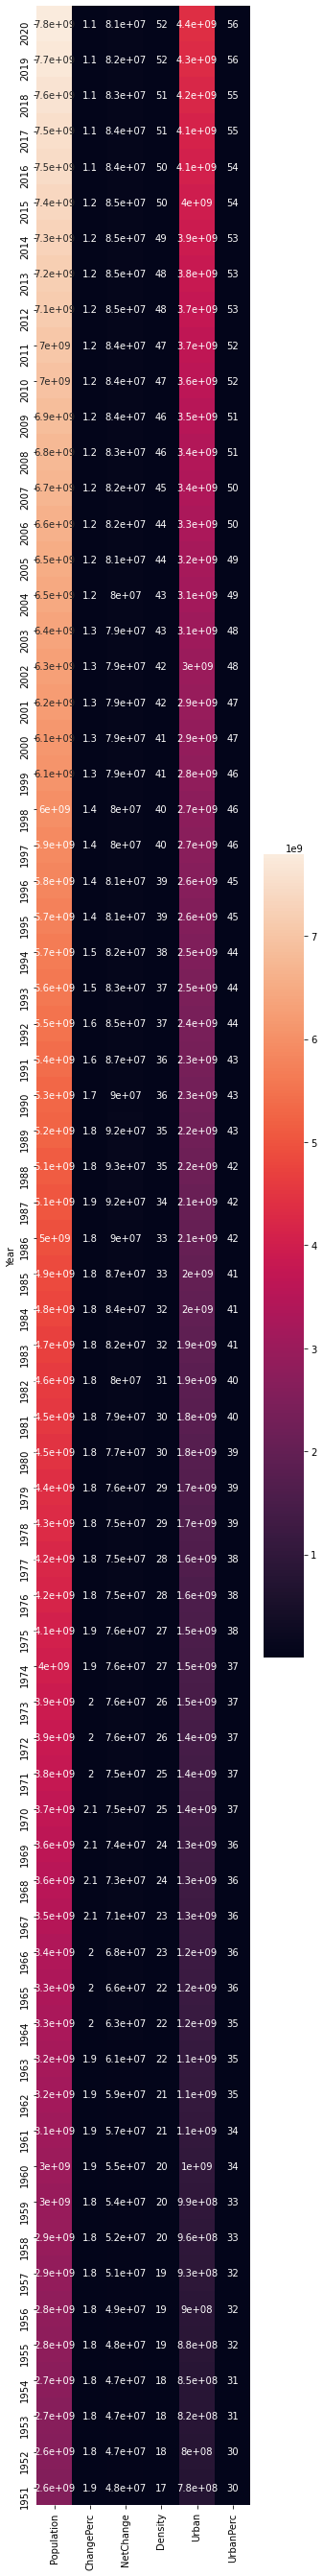

In [13]:
plt.figure(figsize=(5,200))
sns.heatmap(pop_dataset,annot=True,square=True)

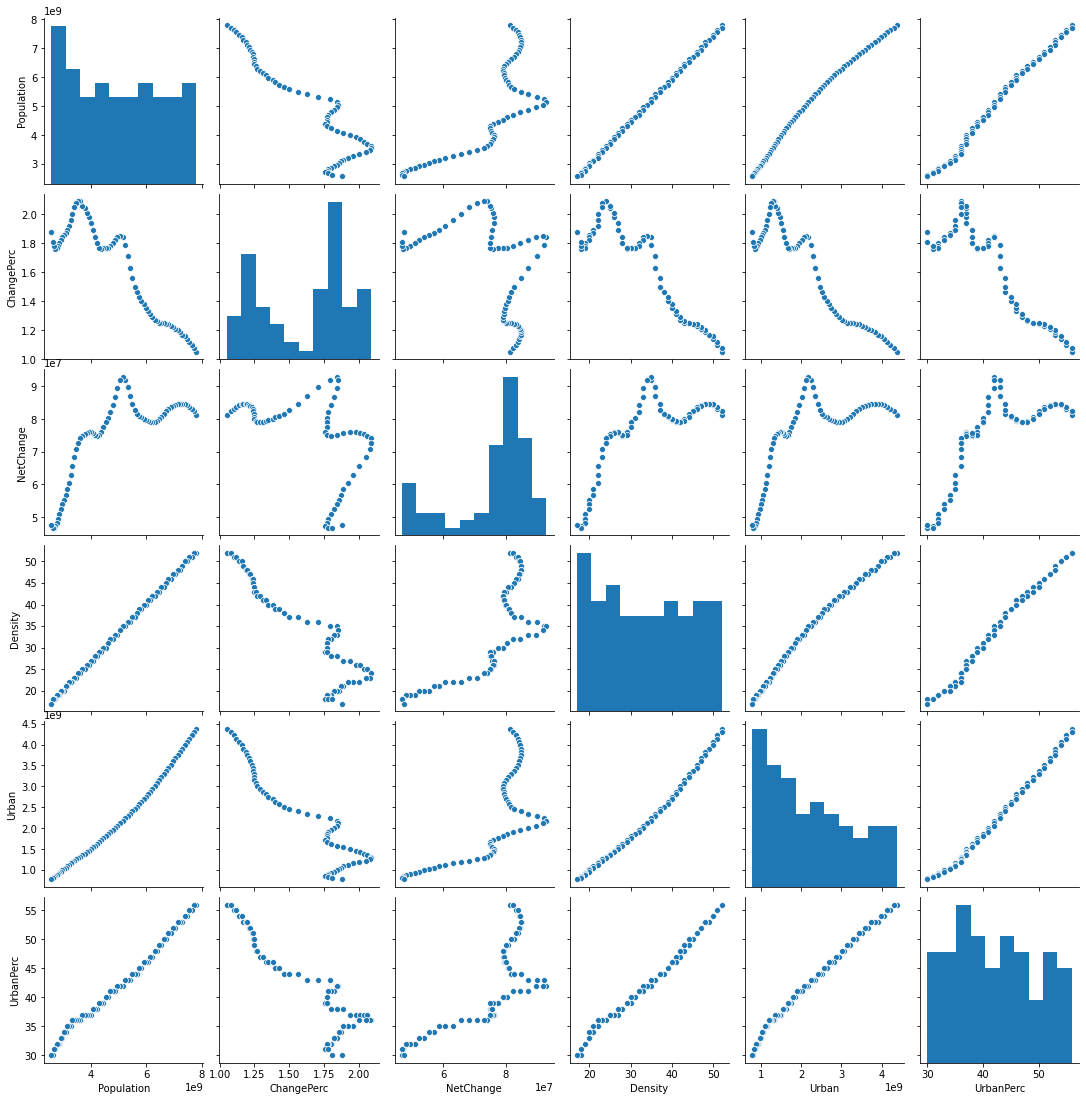

In [14]:
sns.pairplot(pop_dataset)

Population is directly related to Urban population and Urban population percent.
And its obvious with the density (population per square km area) to increase with the increasing population.
Population is almost inversely related to percentage change in population.

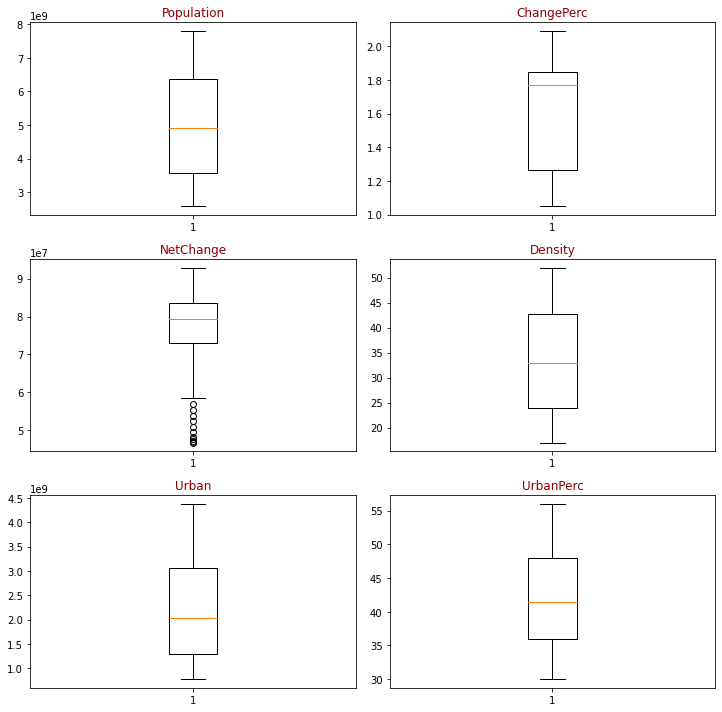

In [15]:
RP=plt.figure(figsize=(10,10))
for i, feature in enumerate(pop_dataset.columns):
    r=RP.add_subplot(3,2,i+1)
    plt.boxplot(pop_dataset[feature],data=pop_dataset)
    r.set_title(feature,color='DarkRed')
RP.tight_layout()  

From the box-plot, Net change in population has a outlier. So, removing the feature for final model evaluation.

Since, from the heat map and pair plot, it can be seen that urban percent and urban are highly correlated and also, the features almost caters same practical use, but since, urban percent is approximately normalized, so, removing urban in the feature column will prevent the model from overfitting.

# Models

In [16]:
X=pop_dataset.drop(['Population','Urban','NetChange'],axis=1)
X=pd.DataFrame(scale(X))
X.index=pop_dataset.index
Y=pop_dataset['Population']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

### Linear Regression

In [17]:
model_LR=LinearRegression()
model_LR.fit(X_train,Y_train)
Y_pred_LR=model_LR.predict(X_test)
print('Score:',model_LR.score(X_test,Y_test)*100)

Score: 99.89151736970133


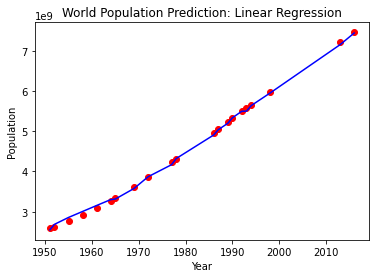

In [18]:
plt.scatter(X_test.index, Y_test, color = 'red')
sns.lineplot(X_test.index,Y_pred_LR, color = 'blue')
plt.title('World Population Prediction: Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [19]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred_LR))
print('Linear Regression Coefficients:',model_LR.coef_)
print('R2 Score:',r2_score(Y_test,Y_pred_LR))
print('Mean Square Error:',mean_squared_error(Y_test,Y_pred_LR))

Mean Absolute Error: 40168732.378216445
Linear Regression Coefficients: [-1.98155812e+07  1.43285346e+09  1.26561004e+08]
R2 Score: 0.9989151736970133
Mean Square Error: 2188102139106312.5


### Logistic Regression

In [20]:
model_LGR=LogisticRegression()
model_LGR.fit(X_train,Y_train)
Y_pred_LGR=model_LGR.predict(X_test)

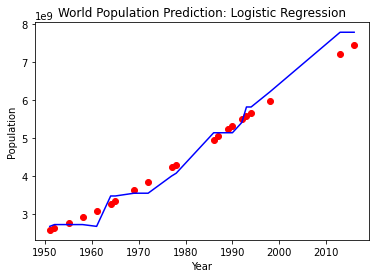

In [21]:
plt.scatter(X_test.index, Y_test, color = 'red')
sns.lineplot(X_test.index,Y_pred_LGR, color = 'blue')
plt.title('World Population Prediction: Logistic Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [22]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred_LGR))
print('Linear Regression Coefficients:\n',model_LGR.coef_)
print('R2 Score:',r2_score(Y_test,Y_pred_LGR))
print('Mean Square Error:',mean_squared_error(Y_test,Y_pred_LGR))

Mean Absolute Error: 200655140.23809522
Linear Regression Coefficients:
 [[-1.01980804e-01 -6.72282684e-01 -7.40679235e-01]
 [-1.50242265e-01 -6.79133037e-01 -7.46425353e-01]
 [-7.83355084e-02 -6.30719039e-01 -6.56481176e-01]
 [-3.07213460e-02 -6.23339630e-01 -6.50187742e-01]
 [ 8.90548198e-02 -5.66763147e-01 -5.52973880e-01]
 [ 1.50504252e-01 -5.89078751e-01 -4.40656185e-01]
 [ 2.47802568e-01 -5.35036798e-01 -3.45147135e-01]
 [ 3.29960193e-01 -4.50563305e-01 -3.54906821e-01]
 [ 6.60999656e-01 -3.53430227e-01 -2.21245184e-01]
 [ 7.31778722e-01 -3.41824270e-01 -2.11258298e-01]
 [ 7.66958444e-01 -2.63861186e-01 -2.26294123e-01]
 [ 7.25102240e-01 -2.29687346e-01 -1.46878764e-01]
 [ 6.78981538e-01 -2.38583990e-01 -1.54777691e-01]
 [ 5.56017571e-01 -1.94014677e-01 -1.99848001e-01]
 [ 4.80804243e-01 -1.42005802e-01 -2.38612997e-01]
 [ 3.90325688e-01 -1.98965886e-01 -1.57622220e-01]
 [ 2.96669663e-01 -1.55737933e-01 -2.05157298e-01]
 [ 1.63057447e-01 -1.64409606e-01 -1.68268572e-01]
 [ 2.0274

### Kernel Ridge

In [23]:
model_KR=KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
model_KR.fit(X_train,Y_train)
Y_pred_KR=model_KR.predict(X_test)
print('Score:',model_KR.score(X_test,Y_test)*100)

Score: 99.48029026223928


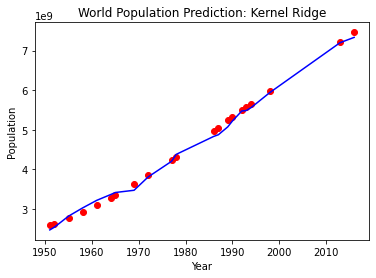

In [24]:
plt.scatter(X_test.index, Y_test, color = 'red')
sns.lineplot(X_test.index,Y_pred_KR, color = 'blue')
plt.title('World Population Prediction: Kernel Ridge')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [25]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred_KR))
print('R2 Score:',r2_score(Y_test,Y_pred_KR))
print('Mean Square Error:',mean_squared_error(Y_test,Y_pred_KR))

Mean Absolute Error: 91483221.92334032
R2 Score: 0.9948029026223928
Mean Square Error: 1.0482581273866326e+16


### XGBoost Regressor

In [26]:
model_XGB = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_XGB.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)], verbose=False)
Y_pred_XGB=model_XGB.predict(X_test)
print('Score:',model_XGB.score(X_test,Y_test)*100)

Score: 99.46146480389254


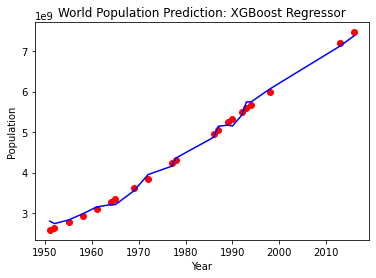

In [27]:
plt.scatter(X_test.index, Y_test, color = 'red')
sns.lineplot(X_test.index,Y_pred_XGB, color = 'blue')
plt.title('World Population Prediction: XGBoost Regressor')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [28]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred_XGB))
print('R2 Score:',r2_score(Y_test,Y_pred_XGB))
print('Mean Square Error:',mean_squared_error(Y_test,Y_pred_XGB))

Mean Absolute Error: 95327046.47619048
R2 Score: 0.9946146480389254
Mean Square Error: 1.0862292067794706e+16


### Random Forest Regressor

In [29]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=0)
model_RFR.fit(X_train,Y_train)
Y_pred_RFR=model_RFR.predict(X_test)
print('Score:',model_RFR.score(X_test,Y_test)*100)

Score: 99.68984681140178


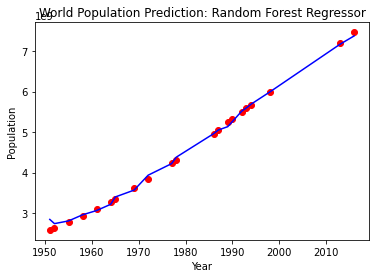

In [30]:
plt.scatter(X_test.index, Y_test, color = 'red')
sns.lineplot(X_test.index,Y_pred_RFR, color = 'blue')
plt.title('World Population Prediction: Random Forest Regressor')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [31]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred_RFR))
print('R2 Score:',r2_score(Y_test,Y_pred_RFR))
print('Mean Square Error:',mean_squared_error(Y_test,Y_pred_RFR))

Mean Absolute Error: 56068973.77523808
R2 Score: 0.9968984681140178
Mean Square Error: 6255811216541915.0
